# TF-IDF
행에는 사업보고서의 토큰화된 텍스트, 열에는 연도별 사업보고서가 나열되고 개별 문자에서 발생한 용어의 발생 빈도를 원소로 하는 행렬을 DTM(Document-Term-frequency Matrix)라고 부릅니다.

하지만 DTM의 용어들의 빈도만을 가지고 문자들의 차별성과 용어들의 중요도를 반영하기 어려워 대중적으로 많이 사용하는 가중치인 TF-IDF를 적용합니다.
사이킷런의 Tfidfvectorizer 함수를 통하여 벡터화를 시키고 linear kernel 함수를 통해 코사인 유사도를 구해주었습니다

In [3]:
import pandas as pd
df_cosine = pd.read_csv('./data/preprocessing/preprocessed/df_cosine.csv',index_col=0)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_cosine['str_tokens'])
# 형태소 분석마친 토큰들에 대해서 tf-idf 수행
print(tfidf_matrix.shape) #토큰화를 했을 떄와 안했을때(str) 비교했을 때 단어 수가 약 3배 적어졌다

(2486, 17228)


In [5]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df_cosine.index, index=df_cosine['title']).drop_duplicates() #title에 대하여 index생성

문서별 TF_IDF를 토대로 코사인 유사도를 계산하여 특정 문서와 높거나 낮은 유사도를 가지는 문서리스트를 반환하는 함수를 생성해 살펴보았습니다.

### TF-IDF의 단어 빈도 비교

In [13]:
tfidfv = TfidfVectorizer().fit(df_cosine['str_tokens'])
print(tfidfv.transform(df_cosine['str_tokens']).toarray())
# print(tfidfv.vocabulary_)

[[0.29401491 0.         0.         ... 0.         0.         0.        ]
 [0.33397875 0.         0.         ... 0.         0.         0.        ]
 [0.39506839 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.37911618 0.         0.         ... 0.         0.         0.        ]
 [0.37388569 0.         0.         ... 0.         0.         0.        ]
 [0.44900859 0.         0.         ... 0.         0.         0.        ]]


In [14]:
tfd = pd.DataFrame(tfidfv.vocabulary_.items(), columns=['단어' , '빈도'])
tfd.sort_values('빈도',ascending=False).head()

,단어,빈도
3398,힘찬,17227
9682,힘차,17226
16647,힘있,17225
718,힘입,17224
2827,힘쓸,17223


In [16]:
tfidfv_noun = TfidfVectorizer().fit(df_cosine['str_nouns'])
tfd_nouns = pd.DataFrame(tfidfv_noun.vocabulary_.items(),columns = ['단어','빈도'])
tfd_nouns.sort_values('빈도',ascending=False).head()

,단어,빈도
9999,힐링,12128
3454,히트,12127
3437,히알루론산,12126
10844,히브,12125
9218,히든,12124


## Wordcloud

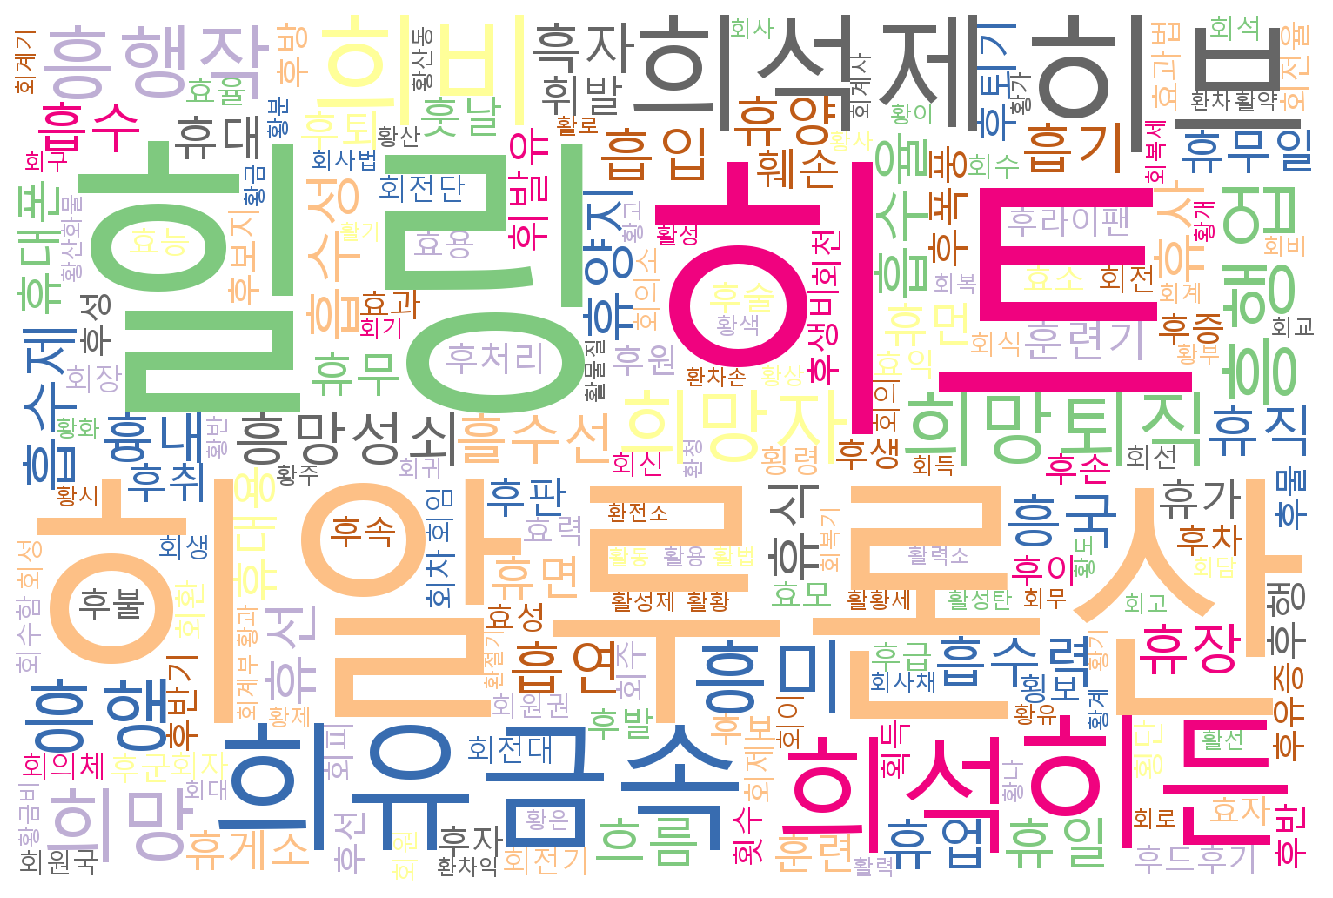

In [17]:
from wordcloud import WordCloud #wordcloud 생성
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)
plt.rcParams["figure.figsize"] = (15,8)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(tfidfv_noun.vocabulary_) #여기에 dic형태넣어주기

plt.imshow(wordcloud)
plt.axis('off')
plt.show;

## 기업별 코사인 유사도 비교

In [6]:
def get_similar_documents(title, cosine_sim =  cosine_sim):
    #선택한 문서의 title로 해당되는 index를 가져온다.
    idx = indices[title] 
    
    #모든 문서에 대해서 해당 문서와의 유사도를 구한다.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #유사도에 따라 문서 정렬
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    #가장 유사한 10개 문서 가져온다.
    sim_scores = sim_scores[1:11]
    
    #가장 유사한 10개 문서의 인덱스 가져온다
    doc_indices = [i[0] for i in sim_scores]
    
    #가장 유사한 10개 문서의 title을 리턴
    for i in sim_scores:
        print(df_cosine['title'].iloc[i[0]]+ '  ('+ "%0.2f" %(i[1])+ ')') 

In [7]:
def get_different_documents(title, cosine_sim =  cosine_sim):
    #선택한 문서의 title로 해당되는 index를 가져온다.
    idx = indices[title] 
    
    #모든 문서에 대해서 해당 문서와의 유사도를 구한다.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #유사도에 따라 문서 정렬
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    #가장 덜 유사한 10개 문서 가져온다.
    sim_scores = sim_scores[-10:]
    
    #가장 덜 유사한 10개 문서의 인덱스 가져온다
    doc_indices = [i[0] for i in sim_scores]
    
    #가장 덜 유사한 10개 문서의 title을 리턴
    for i in sim_scores:
        print(df_cosine['title'].iloc[i[0]]+ '  ('+ "%0.2f" %(i[1])+ ')') 

In [8]:
get_similar_documents('2018삼성전자')

2019삼성전자  (0.93)
2017삼성전자  (0.93)
2016삼성전자  (0.91)
2015삼성전자  (0.89)
2014삼성전자  (0.86)
2013삼성전자  (0.84)
2012삼성전자  (0.84)
2011삼성전자  (0.79)
2016CJ  (0.78)
2018CJ  (0.78)


In [9]:
get_similar_documents('2015코오롱인더')

2016코오롱인더  (0.99)
2017코오롱인더  (0.98)
2014코오롱인더  (0.93)
2013코오롱인더  (0.91)
2012코오롱인더  (0.66)
2011코오롱인더  (0.57)
2012롯데칠성음료  (0.50)
2018코오롱  (0.47)
2012코오롱  (0.47)
2013코오롱  (0.47)


In [10]:
get_different_documents('2018삼성전자')

2013녹십자  (0.22)
2019일동홀딩스  (0.21)
2013일동홀딩스  (0.21)
2017한솔홀딩스  (0.18)
2015아진카인텍  (0.16)
2019신성이엔지  (0.13)
2018롯데푸드  (0.06)
2017롯데푸드  (0.06)
2016롯데푸드  (0.06)
2017한국콜마  (0.02)


In [11]:
get_similar_documents('2019삼성바이오로직스')

2018삼성바이오로직스  (0.95)
2017삼성바이오로직스  (0.89)
2019삼성물산  (0.66)
2016삼성물산  (0.62)
2018파미셀  (0.62)
2016CJ  (0.61)
2012CJ  (0.61)
2014CJ  (0.61)
2015CJ  (0.61)
2018삼성물산  (0.61)
